In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_excel("Real estate valuation data set.xlsx")
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [6]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [8]:
mat=data.corr()
mat
mat["Y house price of unit area"].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087529
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

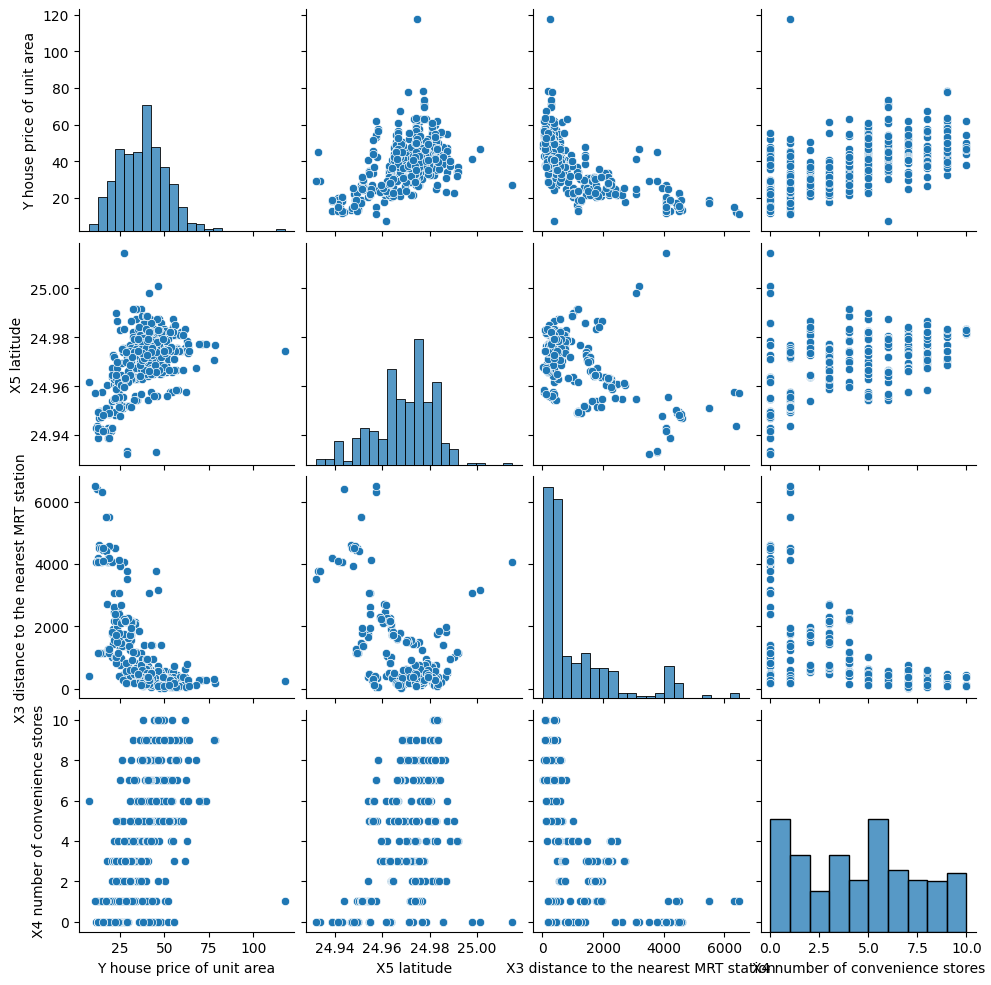

In [9]:
col=["Y house price of unit area", "X5 latitude","X3 distance to the nearest MRT station","X4 number of convenience stores"]
sns.pairplot(data[col])

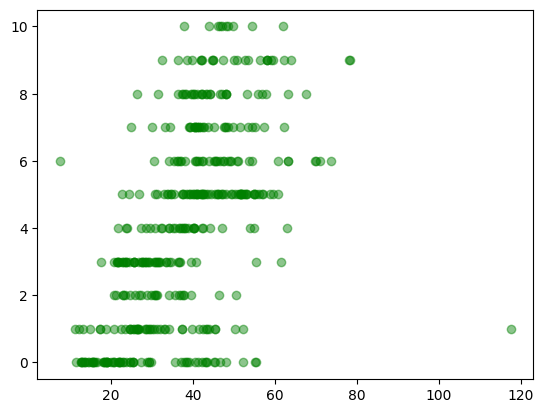

In [10]:
plt.scatter(data["Y house price of unit area"],data["X4 number of convenience stores"], color="Green", alpha=.45)

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(data,test_size=.2,random_state=42)
train_set

In [14]:
train_x_set=train_set.iloc[:,:7]
train_y_set=train_set["Y house price of unit area"]

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
model=DecisionTreeRegressor()
# model=RandomForestRegressor()
model.fit(train_x_set,train_y_set)

DecisionTreeRegressor()

In [16]:
pre1=model.predict(train_x_set)
pre2=model.predict(train_x_set[:10])
pre2

array([42.7, 23.9, 32.1, 38.3, 40.8, 30.8, 34.6, 29.3, 35.5, 34.1])

In [17]:
list(train_y_set[:10])

[42.7, 23.9, 32.1, 38.3, 40.8, 30.8, 34.6, 29.3, 35.5, 34.1]

In [18]:
from sklearn.metrics import mean_squared_error
EMS=mean_squared_error(train_y_set,pre1)
EMS

0.0

In [19]:
REMS=np.sqrt(EMS)
REMS

np.float64(0.0)

In [20]:
from sklearn.model_selection import cross_validate
score=cross_validate(model,train_x_set,train_y_set,scoring="neg_mean_squared_error",cv=10)
CV_REMS=np.sqrt(-score["test_score"])
CV_REMS

array([10.55022999,  5.59967532, 11.21955814, 15.95360698,  7.80067985,
       10.25175521,  8.74249462, 15.89955212,  7.88137428, 13.66201325])

In [21]:
print("CV_REMS:",CV_REMS)
print("Mean:",np.mean(CV_REMS))
print("Median:",np.std(CV_REMS))

CV_REMS: [10.55022999  5.59967532 11.21955814 15.95360698  7.80067985 10.25175521
  8.74249462 15.89955212  7.88137428 13.66201325]
Mean: 10.756093975655125
Median: 3.317633619390234


In [23]:
from joblib import dump,load
dump(model,"newHPP.joblib")

['newHPP.joblib']